In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Sources: Course notes and Walter Gautschi's 'Numerical Analysis'

# Group Work 4:  Numerical Methods for IVP ODEs

## Question 1 - Warm Up

Consider the initial value problem
$$
    x''(x) = \cos(xt), ~~~ x(0) = 1, ~~~ x'(0) = 0, ~~ 0\leq t \leq 1
$$

**(a)** Reformulate the problem as an IVP for a system of ODEs

$$x''(t) = \cos(xt)$$

$$
\vec{u} = \begin{bmatrix}
                x\\
                x'
             \end{bmatrix}=
         \begin{bmatrix}
             u_1\\
             u_2
         \end{bmatrix}
$$

$$
\vec{u(0)} = \begin{bmatrix}
                1\\
                0
             \end{bmatrix}
$$

$$
\frac{\text{d} \vec{u}}{\text{d}t} = 
\begin{bmatrix}
    x'\\
    x''
\end{bmatrix}=
\begin{bmatrix}
    u_2\\
    cos(u_{1}t)
\end{bmatrix}
$$

**(b)** Plot the trajectory using Euler's method, RK2, and RK4.

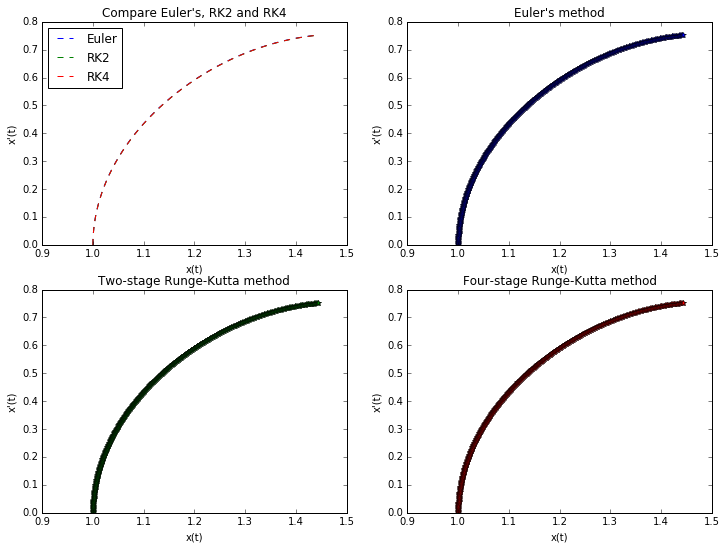

In [4]:
def f(u, t):
    return numpy.array([u[1], numpy.cos(u[0] * t)])

num_eval = 500 #number of evaluations
t = numpy.linspace(0.0, 1.0, num_eval)
delta_t = t[1] - t[0]

u_euler = numpy.empty((2, num_eval))
u_euler[:, 0] = (1.0, 0.0)
u_rk2 = numpy.empty((2, num_eval))
u_rk2[:, 0] = (1.0, 0.0)
u_rk4 = numpy.empty((2, num_eval))
u_rk4[:, 0] = (1.0, 0.0)
for (n, t_n) in enumerate(t[:-1]): # n = 0 ~ 498
    #Euler's Method
    u_euler[:, n + 1] = u_euler[:, n] + delta_t * f(u_euler[:, n], t_n)
    #RK2
    u_star = u_rk2[:,n] + delta_t * f(u_rk2[:,n], t[n]) / 2.0 #Use Forward Euler to calculate midpoint
    u_rk2[:, n + 1] = u_rk2[:,n] + delta_t * f(u_star, t[n])
    #RK4
    Y_1 = u_rk4[:, n]
    Y_2 = u_rk4[:, n] + delta_t / 2.0 * f(Y_1, t_n) 
    Y_3 = u_rk4[:, n] + delta_t / 2.0 * f(Y_2, t_n) 
    Y_4 = u_rk4[:, n] + delta_t * f(Y_3, t[n])
    u_rk4[:, n + 1] = u_rk4[:, n] + delta_t / 6.0 * (f(Y_1, t_n) + 2.0 * f(Y_2, t_n) + 2.0 * f(Y_2, t_n) + f(Y_3, t_n))
    
fig = plt.figure()
fig.set_figheight(fig.get_figheight() * 2.2)
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = [None, None, None, None]
axes[0] = fig.add_subplot(2, 2, 1)
axes[0].plot(u_euler[0,:], u_euler[1,:],'b--',label = 'Euler')
axes[0].plot(u_rk2[0,:], u_rk2[1,:],'g--', label = 'RK2')
axes[0].plot(u_rk4[0,:], u_rk4[1,:],'r--', label = 'RK4')
axes[0].set_title("Compare Euler's, RK2 and RK4")
axes[0].set_xlabel("x(t)")
axes[0].set_ylabel("x'(t)")
axes[0].legend(loc = 2)
axes[1] = fig.add_subplot(2, 2, 2)
axes[1].plot(u_euler[0,:], u_euler[1,:],'b*')
axes[1].set_title("Euler's method")
axes[1].set_xlabel("x(t)")
axes[1].set_ylabel("x'(t)")
axes[2] = fig.add_subplot(2, 2, 3)
axes[2].plot(u_rk2[0,:], u_rk2[1,:],'g*')
axes[2].set_title("Two-stage Runge-Kutta method")
axes[2].set_xlabel("x(t)")
axes[2].set_ylabel("x'(t)")
axes[3] = fig.add_subplot(2, 2, 4)
axes[3].plot(u_rk4[0,:], u_rk4[1,:],'r*')
axes[3].set_title("Four-stage Runge-Kutta method")
axes[3].set_xlabel("x(t)")
axes[3].set_ylabel("x'(t)")
plt.show()

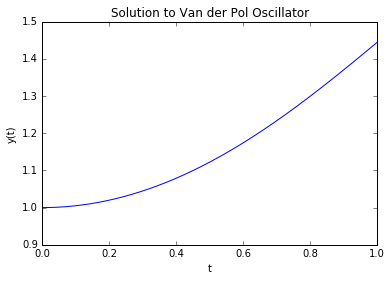

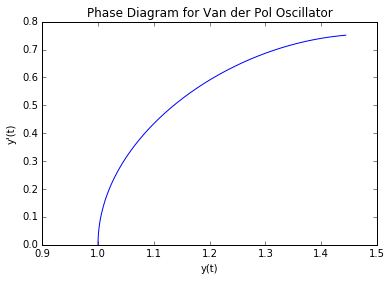

In [3]:
import scipy.integrate as integrate

def f(t, u, mu=5):
    return numpy.array([u[1], numpy.cos(u[0] * t)])

t = numpy.linspace(0.0, 1.0, 500)
u = numpy.empty((2, 500))
u[:, 0] = [1.0, 0.0]

integrator = integrate.ode(f)
integrator.set_integrator("dopri5")
integrator.set_initial_value(u[:, 0])

for (n, t_n) in enumerate(t[1:]):
    integrator.integrate(t_n)
    if not integrator.successful():
        break
    u[:, n + 1] = integrator.y
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t, u[0,:])
axes.set_title("Solution to Van der Pol Oscillator")
axes.set_xlabel("t")
axes.set_ylabel("y(t)")

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(u[0,:], u[1, :])
axes.set_title("Phase Diagram for Van der Pol Oscillator")
axes.set_xlabel("y(t)")
axes.set_ylabel("y'(t)")

plt.show()

## Question 2 - Van der Pol Oscillator

Lets find a solution to another oscillator IVP ODE problem just like in the notes (see solution to Van der Pol Oscillator). It is called a Rayleigh Oscillator and is closely related to the Rayleigh differential equation.  The main difference is that the $x^2$ term  is replaced with a $\dot{x}^2$ term.  

Each system has the property that the origin is an unstable equilibrium point and trajectories near it spiral outward until either the $x^2$ or $\dot{x}^2$ get too large and are offset by damping.  

Here is an elegant version of a forced Rayleigh Oscillator with a chaotic solution:
$$ 
    \ddot{x} + (\dot{x}^2-4)\dot{x} + x = 5 \sin(4t)
$$
with the initial condition $(x_0, v_0, t_0) = (-0.9, 4, 0)$.

For more details see Sprott, Julien Clinton. "Elegant Chaos: Algebraically Simple Chaotic Flows." World Scientific

**(a)** Reformulate this problem as an IVP for a system of ODEs. 

$$
\vec{u} = \begin{bmatrix}
                x\\
                x'
             \end{bmatrix}=
         \begin{bmatrix}
             u_1\\
             u_2
         \end{bmatrix}
$$

$$
\vec{u(0)}= \begin{bmatrix}
                x(0)\\
                v(0)
             \end{bmatrix}
          = \begin{bmatrix}
                -0.9\\
                4.0
             \end{bmatrix}
$$

$$
\frac{\text{d} \vec{u}}{\text{d}t} = 
         \begin{bmatrix}
             u_1'\\
             u_2'
         \end{bmatrix}=
\begin{bmatrix}
    x'\\
    x''
\end{bmatrix}=
\begin{bmatrix}
    u_2\\
    5sin(4t)-u^3_2+4u_2-u_1
\end{bmatrix}
$$

**(b)** Solve this problem now using a 4 Step Adams-Bashforth using RK2 to start the method.

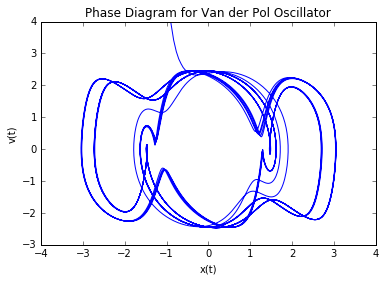

In [6]:
def f(u, t):
    return numpy.array([u[1], 5.0 * numpy.sin(4.0 * t) - u[1] ** 3.0 + 4.0 * u[1] - u[0]])

num_eval = 5000#number of evaluations
t_ab4 = numpy.linspace(0, 100.0, num_eval)
delta_t = t_ab4[1] - t_ab4[0]
u_ab4 = numpy.zeros((2, num_eval))
u_ab4[:, 0] = [-0.9, 4.0] #Initial values U0
#Use RK2 to evalutate U1 ~ U3
for n in xrange(3):
    u_ab4[:, n + 1] = u_ab4[:, n] + 0.5 * delta_t * f(u_ab4[:, n], t_ab4[n]) #mid-point
    u_ab4[:, n + 1] = u_ab4[:, n] + delta_t * f(u_ab4[:, n + 1], t_ab4[n])
    
integration_constant = numpy.array([-9.0, 37.0, -59.0, 55.0])
integration_constant *= (delta_t / 24.0)

for  n in xrange(num_eval - 4): # n = 0 ~ 4995
    u_ab4[:, n + 4] = u_ab4[:, n + 3]
    for j in xrange(0, 4): # j = 0 ~ 3
        u_ab4[:, n + 4] += integration_constant[j] * f(u_ab4[:, n + j], t_ab4[n])

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(u_ab4[0,:], u_ab4[1,:],'b')
axes.set_title("Phase Diagram for Van der Pol Oscillator")
axes.set_xlabel("x(t)")
axes.set_ylabel("v(t)")
plt.show()

In [ ]:
import scipy.integrate as integrate
def f(t, u):
    return numpy.array([u[1], 5.0 * numpy.sin(4.0 * t) - u[1] ** 3.0 + 4.0 * u[1] - u[0]])
#def f(t, u, mu=5):
#    return numpy.array([u[1], mu * (1.0 - u[0]**2) * u[1] - u[0]])

t = numpy.linspace(0.0, 100, 5000)
u = numpy.empty((2, 5000))
u[:, 0] = [-0.9, 4]

integrator = integrate.ode(f)
integrator.set_integrator("dopri5")
integrator.set_initial_value(u[:, 0])

for (n, t_n) in enumerate(t[1:]):
    integrator.integrate(t_n)
    if not integrator.successful():
        break
    u[:, n + 1] = integrator.y
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t, u[0,:])
axes.set_title("Solution to Van der Pol Oscillator")
axes.set_xlabel("t")
axes.set_ylabel("y(t)")

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
print u[:,0:3]
axes.plot(u[0,:], u[1, :])
axes.set_title("Phase Diagram for Van der Pol Oscillator")
axes.set_xlabel("y(t)")
axes.set_ylabel("y'(t)")

plt.show()

## Question 3 - Absolute Stability Regions and Order Stars

**(a)** Plot the regions of absolute stability for the following:
1. Taylor Series methods of order 2 to 5,
1. 3-step and 4-step Adams-Basforth methods, and
1. 3-step and 4-step Adams-Moulton methods.

For the Taylor series methods also determine the interior and exterior of the stability regions.

In [69]:
# Testing block
import math
p = [0.0, 1.0]
for order in xrange(2,6):
    print order, "the order"
    p.append(1.0 / math.factorial(order))
    root = numpy.roots(p)
    print root
    #print root.real * (root.imag == 0.0)
    #for x in [1,2,3] for y in [3,1,4] if x != y
p_6 = [1.0 , 1.0 / 2.0, 1.0 / 6.0, 1.0 / 24.0]
numpy.roots(p_6)

2 the order
[-0.5]
3 the order
[-0.25+0.3227486121839514j -0.25-0.3227486121839514j]
4 the order
[-0.3590285825302397+0.j                 -0.0704857087348799+0.3332951594898457j
 -0.0704857087348799-0.3332951594898457j]
5 the order
[-0.2655313039636272+0.1685558742688728j
 -0.2655313039636272-0.1685558742688728j
  0.0155313039636271+0.2898338812208768j
  0.0155313039636271-0.2898338812208768j]


array([-0.3590285825302397+0.j                ,
       -0.0704857087348799+0.3332951594898457j,
       -0.0704857087348799-0.3332951594898457j])

The region of stability lies within the curve.


C:\Users\user\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


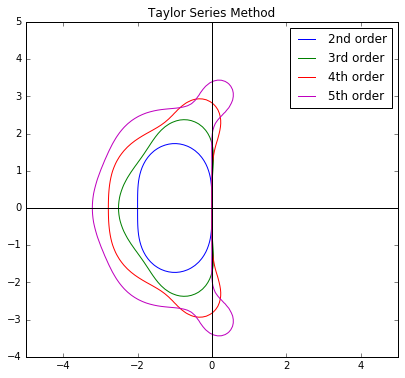

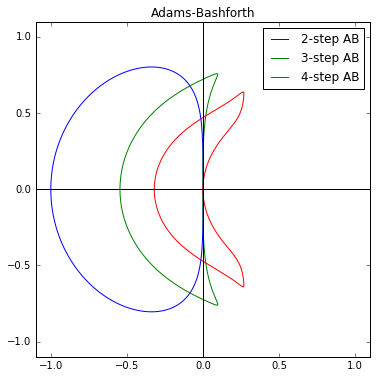

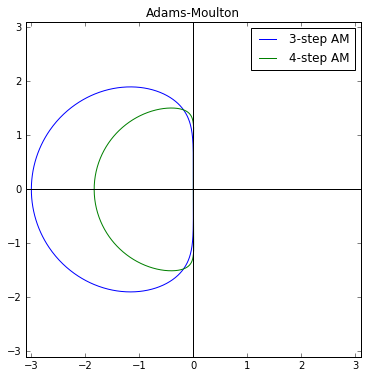

In [7]:
#Taylor series method
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 1.5)
fig.set_figheight(fig.get_figheight() * 1.5)
axes = fig.add_subplot(1, 1, 1)

#Create a complex plane
x = numpy.linspace(-5, 5, 100)
y = numpy.linspace(-4, 5, 100)
X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

Z_2 = numpy.abs(1 + Z + 0.5 * Z**2)
Z_3 = numpy.abs(1 + Z + 0.5 * Z**2 + 1.0/6.0 * Z**3)
Z_4 = numpy.abs(1 + Z + 0.5 * Z**2 + 1.0/6.0 * Z**3 + 1.0 / 24.0 * Z**4)
Z_5 = numpy.abs(1 + Z + 0.5 * Z**2 + 1.0/6.0 * Z**3 + 1.0 / 24.0 * Z**4 + 1.0 / 120.0 * Z **5)
#axes.fill(Z_2.real,Z_2.imag, 'b')

cs2 = axes.contour(X, Y, Z_2, levels=[1.0], colors = 'b')
cs3 = axes.contour(X, Y, Z_3, levels=[1.0], colors = 'g')
cs4 = axes.contour(X, Y, Z_4, levels=[1.0], colors = 'r')
cs5 = axes.contour(X, Y, Z_5, levels=[1.0], colors = 'm')
lines = [ cs2.collections[0], cs3.collections[0], cs4.collections[0], cs5.collections[0]]
labels = ['2nd order','3rd order','4th order','5th order']
axes.legend(lines, labels)
axes.plot(x, numpy.zeros(x.shape),'k')
axes.plot(numpy.zeros(y.shape), y,'k')
axes.set_aspect('equal')
axes.set_title("Taylor Series Method")
axes.legend( loc = 4)
print "The region of stability lies within the curve."
plt.show()



# Adams-Basforth method
x = numpy.linspace(-1.1, 1.1, 100)
y = numpy.linspace(-1.1, 1.1, 100)
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 1.5)
fig.set_figheight(fig.get_figheight() * 1.5)
axes = fig.add_subplot(1, 1, 1)

# 2-step Adams-Bashforth
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
xi = numpy.exp(1j * theta)
rho_2AB = lambda xi: (xi - 1.0) * xi
sigma_2AB = lambda xi: (3.0 * xi - 1.0) / 2.0
z_2AB = rho_2AB(xi) / sigma_2AB(xi)
#z = rho_2AB(xi) / sigma_2AB(xi)
axes.plot(z_2AB.real, z_2AB.imag, label = "2-step AB")

# 3-step Adams-Bashforth
rho_3AB = lambda xi: (xi - 1.0) * xi ** 2.0
sigma_3AB = lambda xi: (5.0 - 16.0 * xi + 23.0 * xi ** 2.0) / 12.0
z_3AB = rho_3AB(xi) / sigma_3AB(xi)
axes.plot(z_3AB.real, z_3AB.imag, label = "3-step AB")

# 3-step Adams-Bashforth
rho_4AB = lambda xi: (xi - 1.0) * xi ** 3.0
sigma_4AB = lambda xi: (-9.0 + 27.0 * xi - 59.0 * xi ** 2.0 + 55.0 * xi **3.0) / 24.0
z_4AB = rho_4AB(xi) / sigma_4AB(xi)
axes.plot(z_4AB.real, z_4AB.imag, label = "4-step AB")

axes.plot(x, numpy.zeros(x.shape),'k')
axes.plot(numpy.zeros(y.shape), y,'k')
axes.set_title("Adams-Bashforth")
axes.set_aspect('equal')
axes.legend(loc = 1)
axes.set_xlim([-1.1, 1.1])
axes.set_ylim([-1.1, 1.1])
plt.show()

# Adams-Moulton
x = numpy.linspace(-3.1, 3.1, 100)
y = numpy.linspace(-3.1, 3.1, 100)
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 1.5)
fig.set_figheight(fig.get_figheight() * 1.5)
axes = fig.add_subplot(1, 1, 1)

# 3-step Adams-Moulton
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
xi = numpy.exp(1j * theta)
rho_3AM = lambda xi: (xi - 1.0) * xi **2.0
sigma_3AM = lambda xi: (1.0 - 5.0 * xi + 19.0 * xi ** 2.0 + 9.0 * xi ** 3.0) / 24.0
z_3AM = rho_3AM(xi) / sigma_3AM(xi)
axes.plot(z_3AM.real, z_3AM.imag, label = "3-step AM")

# 4-step Adams-Moulton
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
xi = numpy.exp(1j * theta)
rho_4AM = lambda xi: (xi - 1.0) * xi **3.0
sigma_4AM = lambda xi: (-19.0 + 106.0 * xi -264.0 * xi ** 2.0 + 646.0 * xi ** 3.0 + 251 * xi ** 4.0) / 720.0
z_4AM = rho_4AM(xi) / sigma_4AM(xi)
axes.plot(z_4AM.real, z_4AM.imag, label = "4-step AM")

axes.plot(x, numpy.zeros(x.shape),'k')
axes.plot(numpy.zeros(y.shape), y,'k')
axes.set_title("Adams-Moulton")
axes.set_aspect('equal')
axes.legend(loc = 1)
axes.set_xlim([-3.1, 3.1])
axes.set_ylim([-3.1, 3.1])
plt.show()

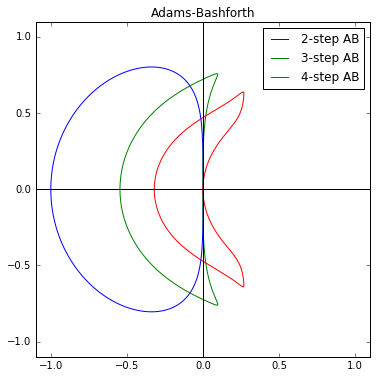

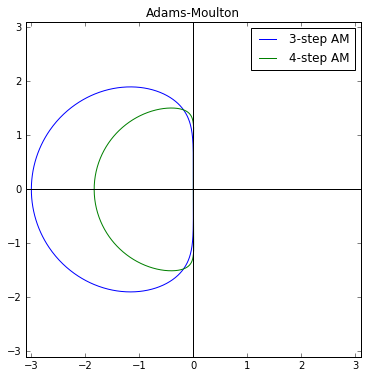

In [46]:


# Adams-Basforth method
x = numpy.linspace(-1.1, 1.1, 100)
y = numpy.linspace(-1.1, 1.1, 100)
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 1.5)
fig.set_figheight(fig.get_figheight() * 1.5)
axes = fig.add_subplot(1, 1, 1)

# 2-step Adams-Bashforth
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
zeta = numpy.exp(1j * theta)
rho_2AB = lambda zeta: (zeta - 1.0) * zeta
sigma_2AB = lambda zeta: (3.0 * zeta - 1.0) / 2.0
z_2AB = rho_2AB(zeta) / sigma_2AB(zeta)
#z = rho_2AB(xi) / sigma_2AB(xi)
axes.plot(z_2AB.real, z_2AB.imag, label = "2-step AB")

# 3-step Adams-Bashforth
rho_3AB = lambda zeta: (zeta - 1.0) * zeta ** 2.0
sigma_3AB = lambda zeta: (5.0 - 16.0 * zeta + 23.0 * zeta ** 2.0) / 12.0
z_3AB = rho_3AB(zeta) / sigma_3AB(zeta)
axes.plot(z_3AB.real, z_3AB.imag, label = "3-step AB")

# 3-step Adams-Bashforth
rho_4AB = lambda zeta: (zeta - 1.0) * zeta ** 3.0
sigma_4AB = lambda zeta: (-9.0 + 27.0 * zeta - 59.0 * zeta ** 2.0 + 55.0 * zeta **3.0) / 24.0
z_4AB = rho_4AB(zeta) / sigma_4AB(zeta)
axes.plot(z_4AB.real, z_4AB.imag, label = "4-step AB")

axes.plot(x, numpy.zeros(x.shape),'k')
axes.plot(numpy.zeros(y.shape), y,'k')
axes.set_title("Adams-Bashforth")
axes.set_aspect('equal')
axes.legend(loc = 1)
axes.set_xlim([-1.1, 1.1])
axes.set_ylim([-1.1, 1.1])
plt.show()

# Adams-Moulton
x = numpy.linspace(-3.1, 3.1, 100)
y = numpy.linspace(-3.1, 3.1, 100)
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 1.5)
fig.set_figheight(fig.get_figheight() * 1.5)
axes = fig.add_subplot(1, 1, 1)

# 3-step Adams-Moulton
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
zeta = numpy.exp(1j * theta)
rho_3AM = lambda zeta: (zeta - 1.0) * zeta **2.0
sigma_3AM = lambda zeta: (1.0 - 5.0 * zeta + 19.0 * zeta ** 2.0 + 9.0 * zeta ** 3.0) / 24.0
z_3AM = rho_3AM(zeta) / sigma_3AM(zeta)
axes.plot(z_3AM.real, z_3AM.imag, label = "3-step AM")

# 4-step Adams-Moulton
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
zeta = numpy.exp(1j * theta)
rho_4AM = lambda zeta: (zeta - 1.0) * zeta **3.0
sigma_4AM = lambda zeta: (-19.0 + 106.0 * zeta -264.0 * zeta ** 2.0 + 646.0 * zeta ** 3.0 + 251 * zeta ** 4.0) / 720.0
z_4AM = rho_4AM(zeta) / sigma_4AM(zeta)
axes.plot(z_4AM.real, z_4AM.imag, label = "4-step AM")

axes.plot(x, numpy.zeros(x.shape),'k')
axes.plot(numpy.zeros(y.shape), y,'k')
axes.set_title("Adams-Moulton")
axes.set_aspect('equal')
axes.legend(loc = 1)
axes.set_xlim([-3.1, 3.1])
axes.set_ylim([-3.1, 3.1])
plt.show()

**(b)** The region of absolute stability as defined ensures that the error does not grow in subsequent time-steps hence why we require $|R(z)| < 1$.  In reality what we really want is that the errors decay faster than the solution or that it grows slower than the true solution.  Consider the solution of an ODE $u(t) = e^{\lambda t}$, if $\lambda < 0$ then we want our errors made at each time step $E^n$ to decay faster than $e^{\lambda t}$ so that $|E^n| < e^{\lambda t}$.  Conversely if $\lambda > 0$ then we might also want $|E^n| < e^{\lambda t}$.  This suggests a new definition of stability, called the **relative stability** defined as

$$|R(z)| \leq |e^z|.$$

These turn out to be difficult to plot but proved pivotal due to work in 1978 by Wanner, Hairer and Nørset.  More recently a new set of regions, called **order stars**, have become more popular to consider.  These are defined as the three regions

$$\begin{aligned}
    \mathcal{A}_{-} &= \{ z \in \mathbb{C}: |R(z)| < |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| < 1\}, \\ 
    \mathcal{A}_{0} &= \{ z \in \mathbb{C}: |R(z)| = |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| = 1\}, ~~~~\text{and} \\
    \mathcal{A}_{+} &= \{ z \in \mathbb{C}: |R(z)| > |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| > 1\}.
\end{aligned}$$

Plot the region $\mathcal{A}_{0}$ for the Taylor series methods asked for in part (a).  Do you see any relation to the number of "fingers" and the order of the method?

The new stability region is the left part of the curve, and the finger rigion is not included.
Also, the number of finger is equal to the number of order of Taylor Series method.


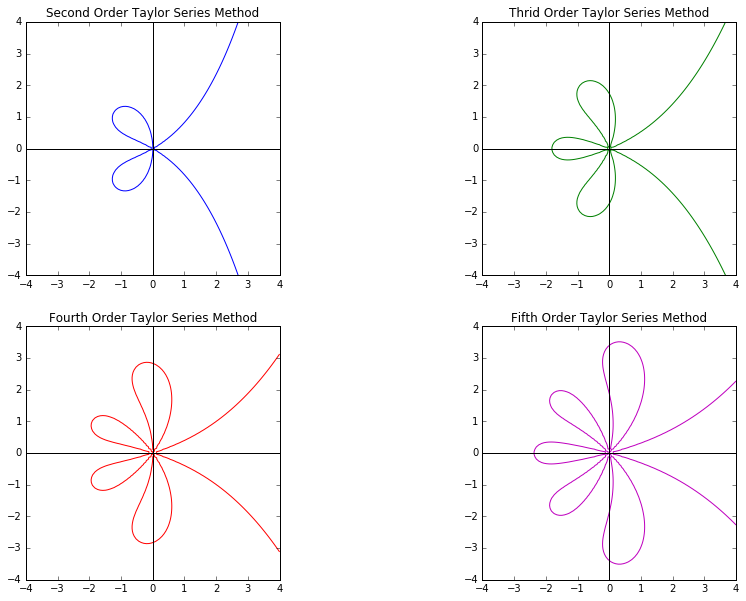

In [8]:
#Taylor series method

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.5)
fig.set_figheight(fig.get_figheight() * 2.5)
axes = []
axes.append(fig.add_subplot(2, 2, 1))
axes.append(fig.add_subplot(2, 2, 2))
axes.append(fig.add_subplot(2, 2, 3))
axes.append(fig.add_subplot(2, 2, 4))

#Create a complex plane
x = numpy.linspace(-4, 4, 100)
y = numpy.linspace(-4, 4, 100)
X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

Z_2 = numpy.abs((1 + Z + 0.5 * Z**2) * numpy.exp(-Z))
Z_3 = numpy.abs((1 + Z + 0.5 * Z**2 + 1.0/6.0 * Z**3)* numpy.exp(-Z))
Z_4 = numpy.abs((1 + Z + 0.5 * Z**2 + 1.0/6.0 * Z**3 + 1.0 / 24.0 * Z**4) * numpy.exp(-Z))
Z_5 = numpy.abs((1 + Z + 0.5 * Z**2 + 1.0/6.0 * Z**3 + 1.0 / 24.0 * Z**4 + 1.0 / 120.0 * Z **5)* numpy.exp(-Z))

cs2 = axes[0].contour(X, Y, Z_2, levels=[1.0], colors = 'b')
cs3 = axes[1].contour(X, Y, Z_3, levels=[1.0], colors = 'g')
cs4 = axes[2].contour(X, Y, Z_4, levels=[1.0], colors = 'r')
cs5 = axes[3].contour(X, Y, Z_5, levels=[1.0], colors = 'm')

axes[0].plot(x, numpy.zeros(x.shape),'k')
axes[1].plot(x, numpy.zeros(x.shape),'k')
axes[2].plot(x, numpy.zeros(x.shape),'k')
axes[3].plot(x, numpy.zeros(x.shape),'k')
axes[0].plot(numpy.zeros(y.shape), y,'k')
axes[1].plot(numpy.zeros(y.shape), y,'k')
axes[2].plot(numpy.zeros(y.shape), y,'k')
axes[3].plot(numpy.zeros(y.shape), y,'k')
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
axes[2].set_aspect('equal')
axes[3].set_aspect('equal')
axes[0].set_title("Second Order Taylor Series Method")
axes[1].set_title("Thrid Order Taylor Series Method")
axes[2].set_title("Fourth Order Taylor Series Method")
axes[3].set_title("Fifth Order Taylor Series Method")
#axes.legend( loc = 4)
print "The new stability region is the left part of the curve, and the finger rigion is not included."
print "Also, the number of finger is equal to the number of order of Taylor Series method."
plt.show()

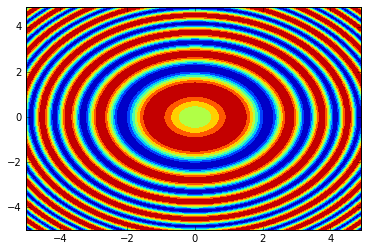

In [2]:
## Testing on filling color bars
x = numpy.arange(-5, 5, 0.1)
y = numpy.arange(-5, 5, 0.1)
xx, yy = numpy.meshgrid(x, y, sparse=True)
z = numpy.sin(xx**2 + yy**2) #/ (xx**2 + yy**2)
h = plt.contourf(x,y,z)